In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [ ]:
!cd
os.chdir('StreetBee')
!ls

# Read, inspect and convert StreetBee data set
### by AIvanov

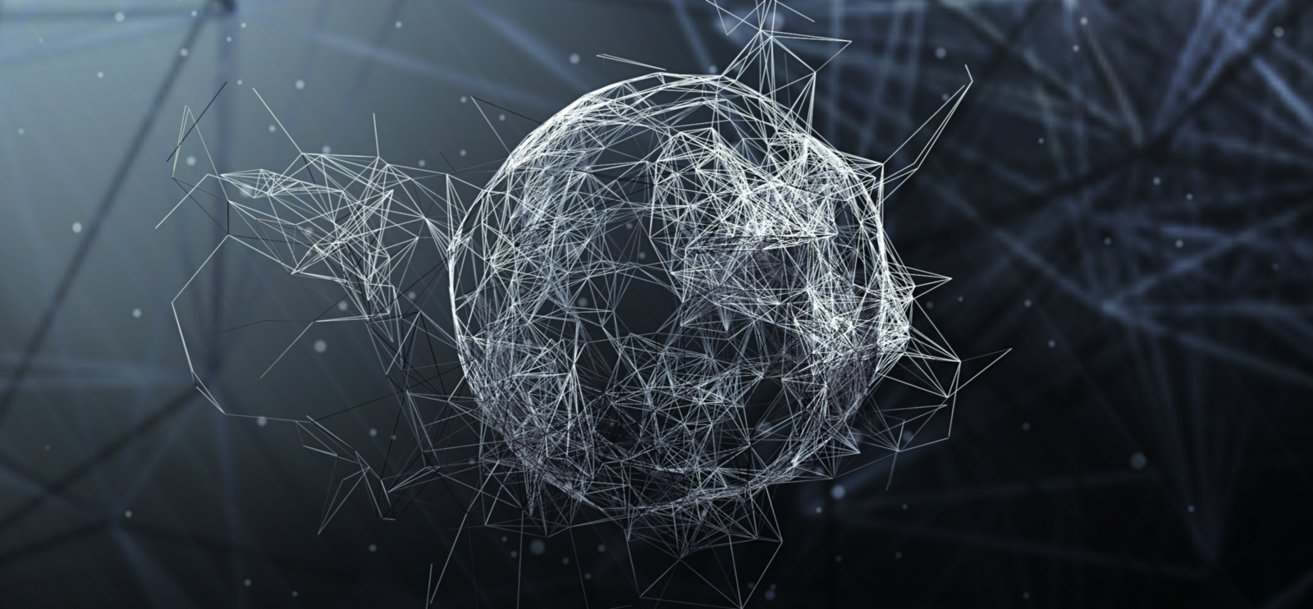

In [2]:
import os
from IPython.display import Image
logo = Image(filename=os.path.join('.', 'logo.jpg'))
display(logo)

In [3]:
import numpy as np
import cv2
import os
import uuid
import torch
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import torchvision.models as models
from shutil import copyfile
import tarfile
import imutils
import json
import time
import random
import multiprocessing as mp
import shutil

## Setup parameters and process input data

In [4]:
debug = False
tar_gz_file_name = "train.tar.gz" # input data
training_proportion = 0.8 # how mach training and validation samples
#mean samples count per class: 
mean = 1190

In [7]:
data_dir = os.path.join(".", os.path.splitext(os.path.splitext(tar_gz_file_name)[0])[0])
if (not os.path.exists(data_dir)):
    tf = tarfile.open(tar_gz_file_name)
    tf.extractall()

In [8]:
print(data_dir)
for root, dirs, files in os.walk(data_dir):  
    if debug:
        print(files)

.\train


In [9]:
data_set = os.path.join('.', 'data_set')

if (not os.path.exists(data_set)):
    os.mkdir(data_set)

train = 'train'    
train_dir = os.path.join(data_set, train)
print(train_dir)
if (not os.path.exists(train_dir)):
    os.mkdir(train_dir)

val = 'val'    
val_dir = os.path.join(data_set, val)
if (not os.path.exists(val_dir)):
    os.mkdir(val_dir)

.\data_set\train


## Create data set from markup and augment it
---



#### todo: augment by color temperature

http://www.askaswiss.com/2016/02/how-to-manipulate-color-temperature-opencv-python.html

### Run first process script. Process JSONs and put cropped and augmented  samples to final training dir

In [11]:
from data_ops import crop_by_markup

In [12]:
start = time. time()
known_categories = crop_by_markup(data_dir, train_dir, mean * 4)
end = time. time()
print('Time elapsed: ' + str((end - start)/60))

00100c8a-9c06-4ac5-80da-ee5a3b5a4079_0
014bbee1-475b-4e91-990e-c0d71eec6b9e_0
0186f008-bcb7-4721-9e08-25c6ea7f5590_0
Image was empty:
poly:
[[ -1 955]
 [ -1 895]
 [165 895]
 [165 955]]
object:
{'type': 'sku', 'rect': [[955.0, -1.0], [895.0, 165.0]], 'sku_candidates': [], 'sku_id': '94579e26-f3d7-429a-9c88-de79dd780686'}
01c7401a-821f-4848-94ae-ff4a2b45e8b7_0
024dcb6a-8e60-412c-a93a-a5bbe8cdbd4b_0
Image was empty:
poly:
[[ -2 168]
 [ -2 124]
 [ 70 124]
 [ 70 168]]
object:
{'type': 'sku', 'rect': [[168.0, -2.0], [124.0, 70.0]], 'sku_candidates': [], 'sku_id': '94579e26-f3d7-429a-9c88-de79dd780686'}
025c8ab0-59e8-4d01-a3a8-8088ba616254_0
Image was empty:
poly:
[[101 286]
 [101  -1]
 [205  -1]
 [205 286]]
object:
{'type': 'sku', 'rect': [[286.0, 101.0], [-1.0, 205.0]], 'sku_candidates': [], 'sku_id': 'cd00ab53-6658-43bf-8101-dc5c2ad66bc8'}
029c05ae-c8e7-49c5-beae-f3241c7dcde7_0
03ef71d3-7b18-4ba2-9165-2f469302a405_0
Image was empty:
poly:
[[  -2  853]
 [1177  841]
 [1183  882]
 [   3  895]

{'polygon': [[854.0, 0.0], [884.0, 853.0], [917.0, 855.0], [889.0, -3.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
15f2f061-1b7a-4d9b-b2b6-b702ab273f79_0
160bc50a-016b-4fd3-a553-de7bc487580d_0
165cb419-da4a-4d0c-a365-452590facf88_0
Image was empty:
poly:
[[1156   -1]
 [1149   98]
 [1092   93]
 [1100   -1]]
object:
{'polygon': [[-1.0, 1156.0], [98.0, 1149.0], [93.0, 1092.0], [-1.0, 1100.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': 'b8ab3504-7980-4cf2-a759-b903091886cf'}
18523ac2-ddc2-4113-8c5d-85c0d29d62c2_0
1867a997-4ce4-4482-8243-217e7cff222b_0
18c668f1-b04e-49f7-bc58-f41688318032_0
18e89189-4a6b-4abb-96f3-0c74c83bd27b_0
Image was empty:
poly:
[[ -1 492]
 [ -1 377]
 [ 28 377]
 [ 28 492]]
object:
{'type': 'sku', 'rect': [[492.0, -1.0], [377.0, 28.0]], 'sku_candidates': [], 'sku_id': '25851eaa-6dbd-4fc4-a649-9d6b9dab66cf'}
Image was empty:
poly:
[[ -3 504]
 [164 508]
 [177 536]
 [  1 543]]
object:
{'polygon': [[504.0, -3.0], [508.0, 

{'polygon': [[203.0, -2.0], [207.0, 120.0], [203.0, 914.0], [244.0, 922.0], [247.0, 143.0], [245.0, 5.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
25c0ff6c-7ed4-4bfa-b6f4-f7afb1eabd32_0
26054043-6d68-4d1a-be56-d4a7bbcf1bef_0
26bc2f8d-fd78-4767-9903-119c5ee08a64_0
Image was empty:
poly:
[[   3  352]
 [1173  389]
 [1189  425]
 [ 456  401]
 [  -4  388]]
object:
{'polygon': [[352.0, 3.0], [389.0, 1173.0], [425.0, 1189.0], [401.0, 456.0], [388.0, -4.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
Image was empty:
poly:
[[  -2  820]
 [ 527  814]
 [1124  800]
 [1141  832]
 [ 633  852]
 [ 176  860]
 [   0  868]]
object:
{'polygon': [[820.0, -2.0], [814.0, 527.0], [800.0, 1124.0], [832.0, 1141.0], [852.0, 633.0], [860.0, 176.0], [868.0, 0.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
27cb759f-78d0-4d8e-acb4-78f18e01c9ea_0
284b82eb-9815-4c20-8378-37ef1464aada_0

369dd9f0-e17e-4328-8634-342421ad1151_0
Image was empty:
poly:
[[ -2 490]
 [ -2 456]
 [ 83 456]
 [ 83 490]]
object:
{'type': 'sku', 'rect': [[490.0, -2.0], [456.0, 83.0]], 'sku_candidates': [], 'sku_id': '94579e26-f3d7-429a-9c88-de79dd780686'}
37cc8994-808f-431d-9665-9d23a99e1d86_0
Image was empty:
poly:
[[ -1 725]
 [956 685]
 [953 718]
 [  5 760]]
object:
{'polygon': [[725.0, -1.0], [685.0, 956.0], [718.0, 953.0], [760.0, 5.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
37f4a047-2304-4a4a-bae8-506d53cf97e6_0
382965c5-bda9-46dd-9d0a-e4c93a44e4e5_0
3869f550-992f-4863-a8d2-1c1f55aed2f3_0
38855c89-437b-4e77-a7db-275e0a9dde0c_0
38b03a85-f75f-4b9e-9471-75dc1fc977e5_0
Image was empty:
poly:
[[ -6 357]
 [ -6 309]
 [ 49 309]
 [ 49 357]]
object:
{'type': 'sku', 'rect': [[357.0, -6.0], [309.0, 49.0]], 'sku_candidates': [], 'sku_id': '94579e26-f3d7-429a-9c88-de79dd780686'}
38f660e0-e8dc-47b4-b1da-a086e0029392_0
Image was empty:
poly:
[[ 25 212]
 [ 25  -

{'polygon': [[927.0, 6.0], [928.0, 63.0], [913.0, 76.0], [927.0, 910.0], [961.0, 907.0], [949.0, 77.0], [972.0, 62.0], [969.0, -3.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
46cc8bc5-965e-439f-9487-ba95eac66afa_0
46d69faa-a2e9-4848-b0f6-c1d11dbc3977_0
4712a01f-8b85-4704-904e-b1a9e442c2c1_0
4740ce41-23c0-41a7-b33a-05187cc687dc_0
Image was empty:
poly:
[[ -1 381]
 [ -1 263]
 [ 40 263]
 [ 40 381]]
object:
{'type': 'sku', 'rect': [[381.0, -1.0], [263.0, 40.0]], 'sku_candidates': [], 'sku_id': '0f3dcd93-1d56-4587-8d8b-0d34d2cf1cb1'}
4772d6ff-327a-4f06-9c9c-0a9df16c4f31_0
47ced278-0f8e-432f-ab44-012893cdfaa4_0
Image was empty:
poly:
[[ -2  95]
 [  0 162]
 [955 179]
 [952 128]]
object:
{'polygon': [[95.0, -2.0], [162.0, 0.0], [179.0, 955.0], [128.0, 952.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
Image was empty:
poly:
[[  8 940]
 [ -2 988]
 [902 831]
 [899 786]]
object:
{'polygon': [[940.0, 8.0], 

{'type': 'sku', 'rect': [[882.0, -2.0], [688.0, 123.0]], 'sku_candidates': [], 'sku_id': 'ea086ef8-7096-47e3-9132-a53d9b22689b'}
50b52190-d771-4430-90d9-01f5f62cad08_0
Image was empty:
poly:
[[ -2 826]
 [ -2 645]
 [ 29 645]
 [ 29 826]]
object:
{'type': 'sku', 'rect': [[826.0, -2.0], [645.0, 29.0]], 'sku_candidates': [], 'sku_id': 'e09e1ed3-f869-4ffc-984b-728744d79203'}
50f90df8-7c91-4c31-9fea-2f6ccbac0dac_0
51a31712-664b-4476-855d-70c45307dca3_0
Image was empty:
poly:
[[   0  273]
 [1273  323]
 [1276  377]
 [  -3  334]]
object:
{'polygon': [[273.0, 0.0], [323.0, 1273.0], [377.0, 1276.0], [334.0, -3.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
51ebdede-3dc8-48f7-a0aa-a05d39a90dd2_0
51fcbf53-b12b-4660-962d-c88a4c872c86_0
5331297f-356a-4a4b-b4aa-98e07e6bdf5b_0
Image was empty:
poly:
[[246  36]
 [246  -1]
 [335  -1]
 [335  36]]
object:
{'type': 'sku', 'rect': [[36.0, 246.0], [-1.0, 335.0]], 'sku_candidates': [], 'sku_id': 'fd297e3d-002c-446f-9

{'type': 'sku', 'rect': [[415.0, -2.0], [390.0, 31.0]], 'sku_candidates': [], 'sku_id': '94579e26-f3d7-429a-9c88-de79dd780686'}
5f06427f-cdcd-4a68-a582-0ba33c0fef39_0
Image was empty:
poly:
[[ -4 252]
 [ -4 206]
 [ 54 206]
 [ 54 252]]
object:
{'type': 'sku', 'rect': [[252.0, -4.0], [206.0, 54.0]], 'sku_candidates': [], 'sku_id': '94579e26-f3d7-429a-9c88-de79dd780686'}
Image was empty:
poly:
[[ -2 447]
 [ -2 306]
 [ 66 306]
 [ 66 447]]
object:
{'type': 'sku', 'rect': [[447.0, -2.0], [306.0, 66.0]], 'sku_candidates': [], 'sku_id': '1cadd9a2-0e48-432b-90ac-b2f0d7f59dee'}
5f647f14-322f-47d5-9fcd-d38d927aa452_0
60399bf8-8459-4450-82a0-802f344ac0c6_0
Image was empty:
poly:
[[  -2  631]
 [  -2  564]
 [1277  564]
 [1277  631]]
object:
{'type': 'sku', 'rect': [[631.0, -2.0], [564.0, 1277.0]], 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
60c08a35-c6f5-4da6-8f1d-2ecb7dac40b8_0
6155605f-8514-45b6-924c-73c48b208ecd_0
6166a5af-2e14-4e28-8f24-7bc1ddc73ff4_0
Image was empty:

69754918-c3e6-4c8b-a4b4-771339827bb4_0
699d6080-64b6-4ce4-ab20-3f2ca621f8f2_0
6a00b8b0-5941-409c-b2f3-32abf9380fd9_0
6a9935cd-fba0-4404-ab7e-f182204e1ab8_0
6acca651-bd97-46e8-8e06-eb5c129579a3_0
6ae2b95a-74ba-4b57-8b04-dae96b057978_0
6c9388cb-0939-4637-937a-a98f8ee53ede_0
Image was empty:
poly:
[[  1 544]
 [ -1 579]
 [ 91 582]
 [ 82 543]]
object:
{'polygon': [[544.0, 1.0], [579.0, -1.0], [582.0, 91.0], [543.0, 82.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
Image was empty:
poly:
[[  0 882]
 [ -2 943]
 [ 48 943]
 [ 60 886]]
object:
{'polygon': [[882.0, 0.0], [943.0, -2.0], [943.0, 48.0], [886.0, 60.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
6d26cccf-c60d-4891-b369-6fc232092cd4_0
6d7ddb11-5377-43ed-b79b-5accd54f7015_0
6dcb020b-95d7-4a0e-93cf-d8c4f7828a27_0
Image was empty:
poly:
[[713 116]
 [713  -1]
 [771  -1]
 [771 116]]
object:
{'type': 'sku', 'rect': [[116.0, 713.0], [-1.0, 771.0]], 'sku_

{'polygon': [[861.0, 5.0], [899.0, -2.0], [769.0, 1005.0], [729.0, 999.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
7b891789-44a5-4ee9-b14d-14ca8448bc69_0
7c518a71-4e0b-44a4-8582-479ce315f881_0
7c51decf-ad7b-4279-9f49-de23390cf37f_0
Image was empty:
poly:
[[ -1 235]
 [  6 291]
 [952 311]
 [957 263]]
object:
{'polygon': [[235.0, -1.0], [291.0, 6.0], [311.0, 952.0], [263.0, 957.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
Image was empty:
poly:
[[   0  994]
 [  -3 1041]
 [  59 1042]
 [  75  999]]
object:
{'polygon': [[994.0, 0.0], [1041.0, -3.0], [1042.0, 59.0], [999.0, 75.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
Image was empty:
poly:
[[ -1 845]
 [ -1 810]
 [ 54 810]
 [ 54 845]]
object:
{'type': 'sku', 'rect': [[845.0, -1.0], [810.0, 54.0]], 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
Image was empty:
poly:
[[ -1 291

{'type': 'sku', 'rect': [[232.0, 684.0], [-2.0, 793.0]], 'sku_candidates': [], 'sku_id': '0c3967bf-fac9-443b-8794-8dfeb6416e36'}
Image was empty:
poly:
[[801 232]
 [801  -2]
 [914  -2]
 [914 232]]
object:
{'type': 'sku', 'rect': [[232.0, 801.0], [-2.0, 914.0]], 'sku_candidates': [], 'sku_id': '0c3967bf-fac9-443b-8794-8dfeb6416e36'}
8c1755ac-3a8d-4500-9bb3-18e6f437fe1d_0
8c20b694-178f-4e38-85c0-742105086dae_0
8c7c82cf-7955-4a8e-8bb8-259e3d88df13_0
Image was empty:
poly:
[[ -3 202]
 [ -3 153]
 [ 61 153]
 [ 61 202]]
object:
{'type': 'sku', 'rect': [[202.0, -3.0], [153.0, 61.0]], 'sku_candidates': [], 'sku_id': '94579e26-f3d7-429a-9c88-de79dd780686'}
Image was empty:
poly:
[[  -2  150]
 [1213  186]
 [1224  225]
 [  -6  202]]
object:
{'polygon': [[150.0, -2.0], [186.0, 1213.0], [225.0, 1224.0], [202.0, -6.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
Image was empty:
poly:
[[  -1  390]
 [1215  404]
 [1224  444]
 [  -2  447]]
object:
{'polygon': 

{'type': 'sku', 'sku_candidates': [], 'rect': [[138.0, 975.0], [0.0, 1037.0]]}
No category: 
{'type': 'sku', 'sku_candidates': [], 'rect': [[137.0, 1038.0], [0.0, 1112.0]]}
9a6e9e97-079e-44a0-be1e-d58d40063a74_0
9aa22069-0159-45cc-9101-7d5f775e9b1f_0
Image was empty:
poly:
[[  4 299]
 [ -1 333]
 [938 330]
 [935 303]]
object:
{'polygon': [[299.0, 4.0], [333.0, -1.0], [330.0, 938.0], [303.0, 935.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
9abf9709-f188-42af-9bcb-a526b1d414b2_0
9ac1ce9d-6250-44ad-9eec-32e9e0e217af_0
9b44d2f5-c255-4064-8ac0-975035226c12_0
9b8ed794-4c62-4af8-a9d4-4a8052b32f94_0
9bafb6b3-39b3-4984-bd46-73a343169baa_0
9c14be7a-cb49-4a47-8bab-408eb3272693_0
9c735d4e-e290-4c73-9a32-b91f1725cc05_0
9c7f47d6-1095-4a94-9b99-b1aa18716552_0
9c86761e-4ddc-4d1d-acb0-7b7e5d7f2d62_0
Image was empty:
poly:
[[   0  698]
 [1275  605]
 [1275  653]
 [  -1  778]]
object:
{'polygon': [[698.0, 0.0], [605.0, 1275.0], [653.0, 1275.0], [778.0, -1.0]],

{'type': 'sku', 'rect': [[615.0, -2.0], [577.0, 56.0]], 'sku_candidates': [], 'sku_id': '94579e26-f3d7-429a-9c88-de79dd780686'}
Image was empty:
poly:
[[  6 100]
 [  6  -2]
 [ 65  -2]
 [ 65 100]]
object:
{'type': 'sku', 'rect': [[100.0, 6.0], [-2.0, 65.0]], 'sku_candidates': [], 'sku_id': 'e09e1ed3-f869-4ffc-984b-728744d79203'}
Image was empty:
poly:
[[ 73 100]
 [ 73  -2]
 [144  -2]
 [144 100]]
object:
{'type': 'sku', 'rect': [[100.0, 73.0], [-2.0, 144.0]], 'sku_candidates': [], 'sku_id': 'e09e1ed3-f869-4ffc-984b-728744d79203'}
Image was empty:
poly:
[[168 109]
 [168  -2]
 [216  -2]
 [216 109]]
object:
{'type': 'sku', 'rect': [[109.0, 168.0], [-2.0, 216.0]], 'sku_candidates': [], 'sku_id': 'e09e1ed3-f869-4ffc-984b-728744d79203'}
a78953cf-6013-436b-9166-b5cf7f9d6982_0
a7d1f06a-e75e-457f-9c79-a473ffe53bf4_0
Image was empty:
poly:
[[1115  111]
 [1115   -2]
 [1155   -2]
 [1155  111]]
object:
{'type': 'sku', 'rect': [[111.0, 1115.0], [-2.0, 1155.0]], 'sku_candidates': [], 'sku_id': '2e1eba9

{'polygon': [[276.0, 8.0], [342.0, -2.0], [293.0, 1178.0], [249.0, 1180.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
Image was empty:
poly:
[[   4  600]
 [  -2  644]
 [1126  587]
 [1122  554]]
object:
{'polygon': [[600.0, 4.0], [644.0, -2.0], [587.0, 1126.0], [554.0, 1122.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
Image was empty:
poly:
[[111 231]
 [111  -2]
 [184  -2]
 [184 231]]
object:
{'type': 'sku', 'rect': [[231.0, 111.0], [-2.0, 184.0]], 'sku_candidates': [], 'sku_id': 'fd297e3d-002c-446f-94e7-90b086286288'}
Image was empty:
poly:
[[195 224]
 [195  -2]
 [258  -2]
 [258 224]]
object:
{'type': 'sku', 'rect': [[224.0, 195.0], [-2.0, 258.0]], 'sku_candidates': [], 'sku_id': 'fd297e3d-002c-446f-94e7-90b086286288'}
b7f4bd62-47e6-4a7a-a5a4-8df92c20fb64_0
b7f91ad9-8d3e-48db-a441-3d33a77b134a_0
b84bb8cc-a125-4fbc-ad37-20689a5c8766_0
Image was empty:
poly:
[[283 126]
 [283  -2]
 [378  -2]
 [378

 [ 27 742]]
object:
{'type': 'sku', 'rect': [[742.0, -1.0], [588.0, 27.0]], 'sku_candidates': [], 'sku_id': '0f3dcd93-1d56-4587-8d8b-0d34d2cf1cb1'}
Image was empty:
poly:
[[ -1 554]
 [  1 585]
 [163 585]
 [164 551]]
object:
{'polygon': [[554.0, -1.0], [585.0, 1.0], [585.0, 163.0], [551.0, 164.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
cb2f7922-fe4c-451d-90e3-e8bd9d5de1a8_0
Image was empty:
poly:
[[  -2  236]
 [   0  285]
 [1127  301]
 [1125  262]]
object:
{'polygon': [[236.0, -2.0], [285.0, 0.0], [301.0, 1127.0], [262.0, 1125.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
cb4ff2a3-f7a2-4391-8187-7491de83ad27_0
cb5aa1cc-3af9-484c-9c76-56803329d21b_0
cb71a1a2-1fbb-4765-b6bf-edbc34ab4131_0
cb8e247b-4356-4fab-9dd6-f17749b7cdbb_0
Image was empty:
poly:
[[  1 692]
 [ -1 718]
 [113 723]
 [106 695]]
object:
{'polygon': [[692.0, 1.0], [718.0, -1.0], [723.0, 113.0], [695.0, 106.0]], 'type': 'sku', 'sku_

{'polygon': [[921.0, -6.0], [858.0, 864.0], [885.0, 866.0], [948.0, -2.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
Image was empty:
poly:
[[  -3 1103]
 [ 923 1018]
 [ 925 1057]
 [   2 1145]]
object:
{'polygon': [[1103.0, -3.0], [1018.0, 923.0], [1057.0, 925.0], [1145.0, 2.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
d612aac1-c5bb-45d7-9d0e-807809ba9af5_0
d6a70a89-68c7-4b5c-8320-7bbd3255b7e6_0
d6fa2058-ca8f-4e64-acb7-b28cb151fcd0_0
d720de91-38ef-411e-87d1-d7fa2349bf19_0
d7672fa2-bfc3-44b9-a9d5-33939dec249e_0
Image was empty:
poly:
[[872  56]
 [872  -1]
 [903  -1]
 [903  56]]
object:
{'type': 'sku', 'rect': [[56.0, 872.0], [-1.0, 903.0]], 'sku_candidates': [], 'sku_id': 'e09e1ed3-f869-4ffc-984b-728744d79203'}
Image was empty:
poly:
[[ 97  66]
 [ 97  -1]
 [162  -1]
 [162  66]]
object:
{'type': 'sku', 'rect': [[66.0, 97.0], [-1.0, 162.0]], 'sku_candidates': [], 'sku_id': 'e09e1ed3-f869-4ffc-984b-

{'polygon': [[1141.0, 5.0], [1173.0, -1.0], [1135.0, 846.0], [1106.0, 841.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
Image was empty:
poly:
[[  -2 1076]
 [  -2  915]
 [  25  915]
 [  25 1076]]
object:
{'type': 'sku', 'rect': [[1076.0, -2.0], [915.0, 25.0]], 'sku_candidates': [], 'sku_id': '0f3dcd93-1d56-4587-8d8b-0d34d2cf1cb1'}
e291f5fd-b511-4b0c-8494-f1dc0868d3fa_0
e2fecec5-d085-447d-ae85-3efdb8f0b3ca_0
e33553f4-0cdd-4376-b6d3-ecf94e15aa9f_0
Image was empty:
poly:
[[ 28  -2]
 [ 43 181]
 [ 64 185]
 [119 184]
 [105   0]]
object:
{'polygon': [[-2.0, 28.0], [181.0, 43.0], [185.0, 64.0], [184.0, 119.0], [0.0, 105.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '99b75b97-1743-4b23-be41-76af63acbbcb'}
Image was empty:
poly:
[[119  -1]
 [130 178]
 [208 180]
 [195   1]]
object:
{'polygon': [[-1.0, 119.0], [178.0, 130.0], [180.0, 208.0], [1.0, 195.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '99b75b97-1743-4b23-be41-76af63acbbcb'}
Imag

{'polygon': [[538.0, 5.0], [539.0, 63.0], [583.0, 65.0], [596.0, -1.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
f062ff6d-a32a-4e69-b743-0429acca2aaf_0
Image was empty:
poly:
[[ -1 913]
 [ -1 774]
 [ 32 774]
 [ 32 913]]
object:
{'type': 'sku', 'rect': [[913.0, -1.0], [774.0, 32.0]], 'sku_candidates': [], 'sku_id': '5e12fee0-a860-4fd5-b451-afae2b8f28b1'}
f08a9258-1a32-4d75-9a87-dca3314e3e80_0
Image was empty:
poly:
[[  5 226]
 [ -1 264]
 [949 240]
 [942 200]]
object:
{'polygon': [[226.0, 5.0], [264.0, -1.0], [240.0, 949.0], [200.0, 942.0]], 'type': 'sku', 'sku_candidates': [], 'sku_id': '3540037a-c9b8-403a-b568-37105e8bfadb'}
f0e0783f-6df5-4cd4-88e5-eaa8aa9d03b8_0
f0f134d4-3f06-4067-bad7-b99b4cb67fde_0
f0fbd3f0-09c6-4088-af24-4e36b62a8af0_0
f107aecf-ee6d-4929-9e74-8741546c6917_0
f14b1c38-2a5e-406a-8995-382148b5843a_0
f1a13a88-2fa6-446a-994a-1de1f8727577_0
f1b9d203-d01d-4914-8fa3-98125e3da931_0
f28be0ff-211e-41e6-abc2-4334e36093bd_0
f2c691c7

### Augment training set by noise 

In [ ]:
start = time. time()
sd = 2891
#mean: 
mean = 4748
augment_dataset_by_noise(train_dir, int(sd * 2), int(mean // 4))
end = time. time()
print('Time elapsed: ' + str((end - start)/60))

In [16]:
from data_ops import augment_dataset_by_angle

In [17]:
start = time. time()
sd = 2891
#mean: 
mean = 4748
augment_dataset_by_angle(train_dir)
end = time. time()
print('Time elapsed: ' + str((end - start)/60))

0
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
25
26
27
28
29
3
30
31
33
34
35
36
37
38
39
4
40
41
42
45
5
6
7
8
9
Time elapsed: 15.401906438668568


### Filter outliers

In [ ]:
def filter_outliers(root_dir_path, min_thresh, max_thresh, mean):
    for root, dirs, files in os.walk(root_dir_path):
        for dir_ in dirs:
            dir_full_path = os.path.join(root_dir_path, dir_)
            print(dir_full_path)
            files = os.listdir(dir_full_path)
            files_count = len(files)
            
            if files_count < min_thresh:
                shutil.rmtree(dir_full_path)
                continue
            
            continue
            
            if files_count > max_thresh:
                files = random.sample(files, int(files_count - mean))                          
            else:
                continue
                
            for file in files:
                src = os.path.join(dir_full_path, file)
                os.remove(src)

In [ ]:
mean = 1190
sd = 2891
start = time. time()
filter_outliers(train_dir, int(mean // 4), int(sd), mean)
end = time. time()
print('Time elapsed: ' + str((end - start)/60))

### Move random samples to validation dir

In [ ]:
def copy_files_in_proportion(root_dir_path, dest_dir_path, proportion):
    for root, dirs, files in os.walk(root_dir_path):
        for dir_ in dirs:
            dir_full_path = os.path.join(root_dir_path, dir_)
            print(dir_full_path)
            files = os.listdir(dir_full_path)
            files = random.sample(files, int(len(files) * proportion))              
            for file in files:
                if debug: 
                    print(file)
                src = os.path.join(dir_full_path, file)
                dst_full = os.path.join(dest_dir_path, dir_)
                if (not os.path.exists(dst_full)):
                    os.mkdir(dst_full)             
                dst = os.path.join(dst_full, file)
                os.rename(src, dst)            

              

In [ ]:
start = time. time()
val_proportion = 1.0 - training_proportion
print(val_proportion)
copy_files_in_proportion(train_dir, val_dir, val_proportion)
end = time. time()
print('Time elapsed: ' + str((end - start)/60))

#### Pack data set folders

In [ ]:
val_arch_name = val + '.tar.gz'
!tar -zcvf $val_arch_name $val_dir

## Visualize results:

.\data_set\train


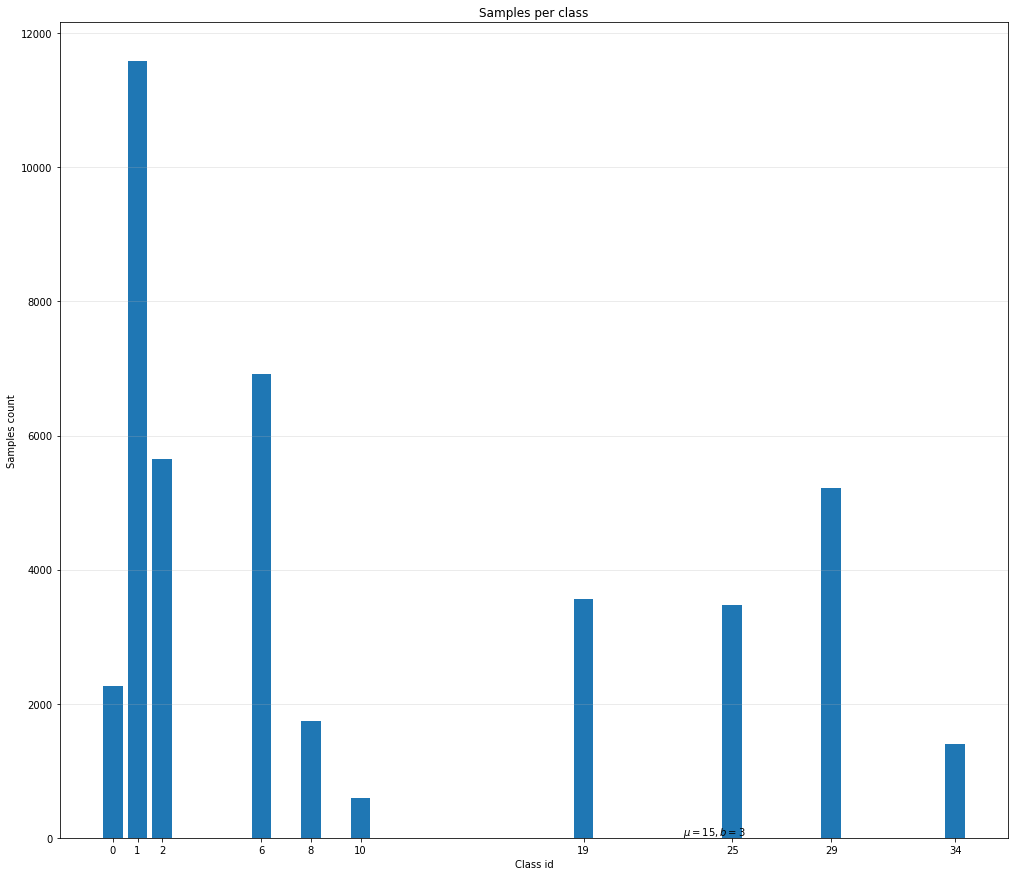

In [18]:
samples_per_class={}
print(train_dir)
files_per_dir={}
for root, dirs, files in os.walk(train_dir):  
    for direct in dirs:
        dir_full_path = os.path.join(train_dir, direct)
        listOfFiles = os.listdir(dir_full_path)
        files_per_dir[dir_full_path] = listOfFiles
        n_samples = len(listOfFiles)
        samples_per_class[int(direct)] = n_samples

plt.rcParams['figure.figsize'] = [17, 15]
plt.bar(samples_per_class.keys(), samples_per_class.values())
plt.grid(axis='y', alpha=0.3)
plt.xlabel('Class id')
plt.xticks([int(x) for x in samples_per_class.keys()])
plt.ylabel('Samples count')
plt.title('Samples per class')
plt.text(23, 45, r'$\mu=15, b=3$')
# Set a clean upper y-axis limit.
plt.show()

In [19]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    plt.rcParams['figure.figsize'] = [20, 20]
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [20]:
def init_data_loaders(input_size, data_dir, batch_size, image_sets = ['train', 'val', 'test']):
    # Data augmentation and normalization for training
    # Just normalization for validation
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'test': transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }
    print("Initializing Datasets and Dataloaders...")    
    # Create training and validation datasets
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in image_sets}
    # Create training and validation dataloaders
    dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in image_sets}
    print('done')
    return image_datasets, dataloaders_dict

In [21]:
data_set
batch_size = 10

In [22]:
image_datasets, dataloaders_dict = init_data_loaders(224, data_set, batch_size)

Initializing Datasets and Dataloaders...
done


In [23]:
dataloaders_dict

{'train': <torch.utils.data.dataloader.DataLoader at 0x206a89394a8>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x206ac099470>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x206ac0a8c50>}

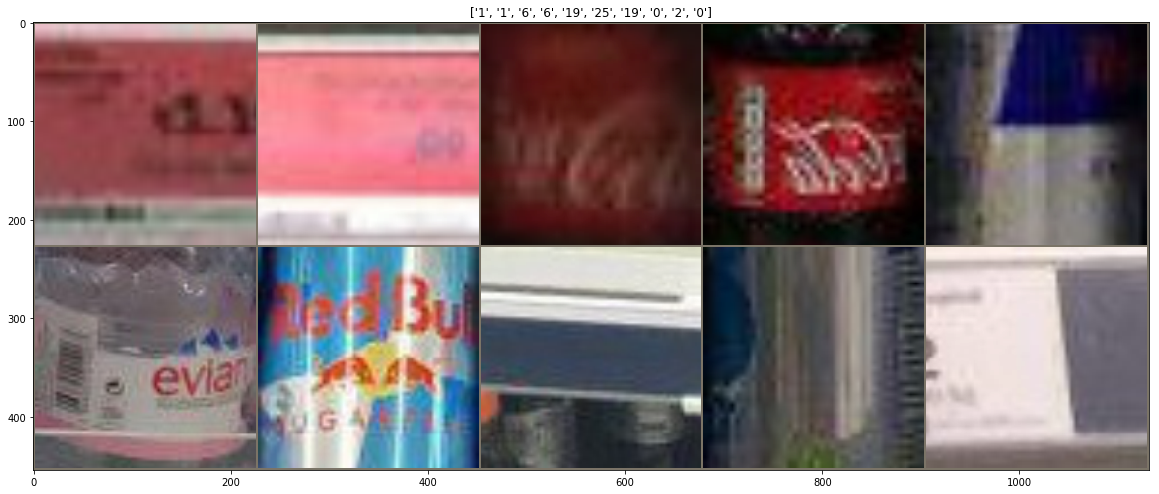

In [34]:
class_names = image_datasets['train'].classes
for inputs, classes in dataloaders_dict['train']:
    # Make a grid from batch
    plt.rcParams['figure.figsize'] = [30, 30]
    out = torchvision.utils.make_grid(inputs, nrow=5)
    imshow(out, title=[class_names[x] for x in classes])
    break

In [27]:
from time import sleep

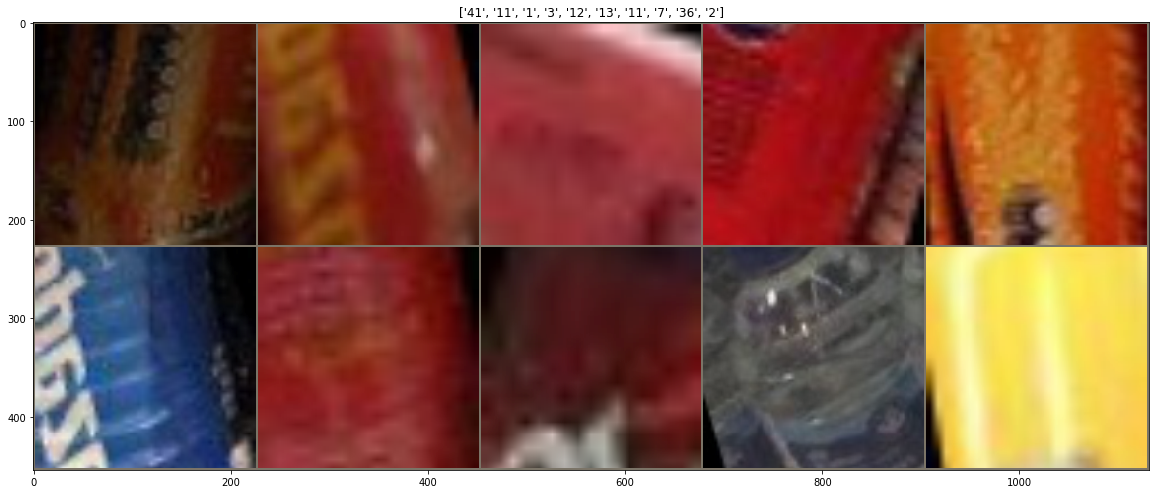

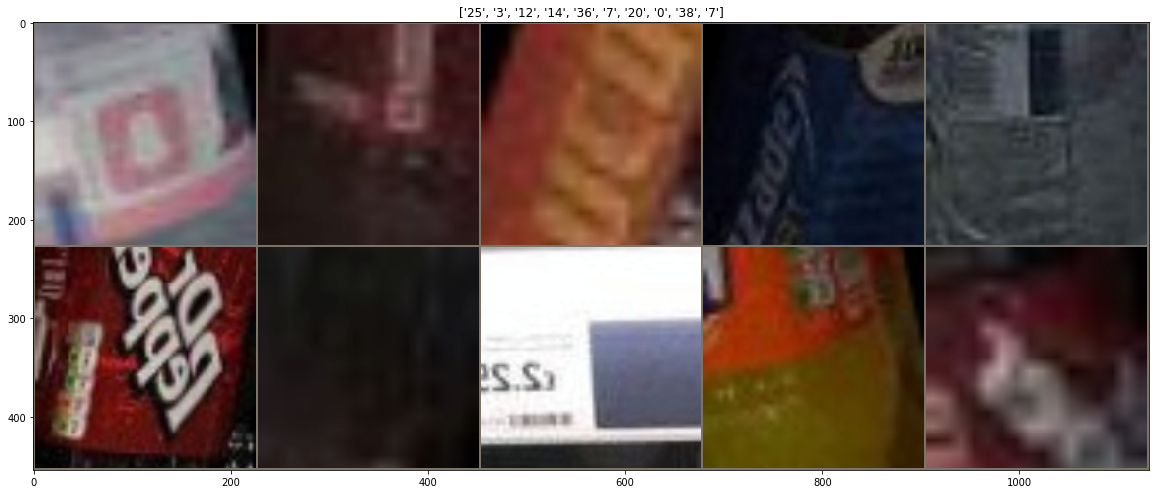

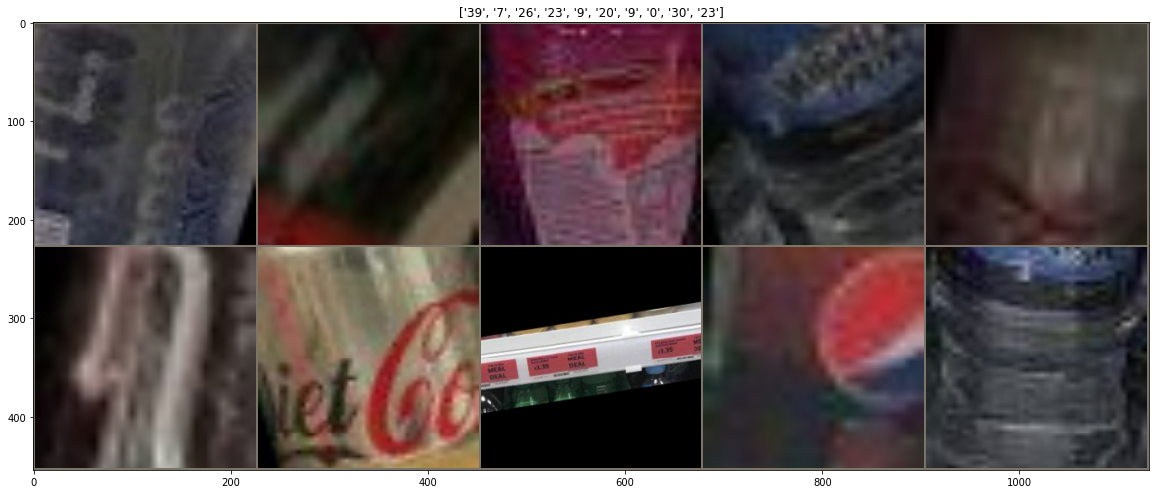

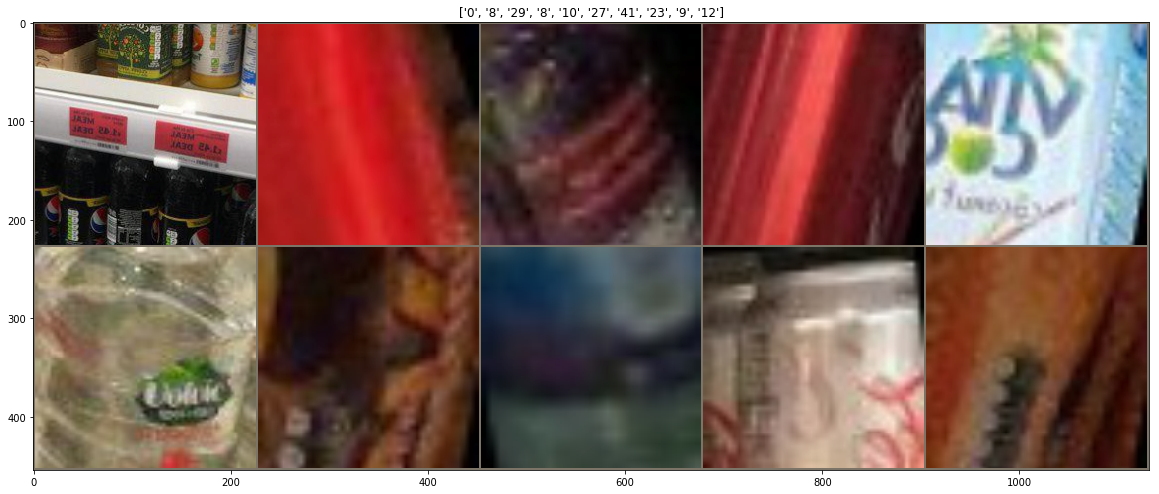

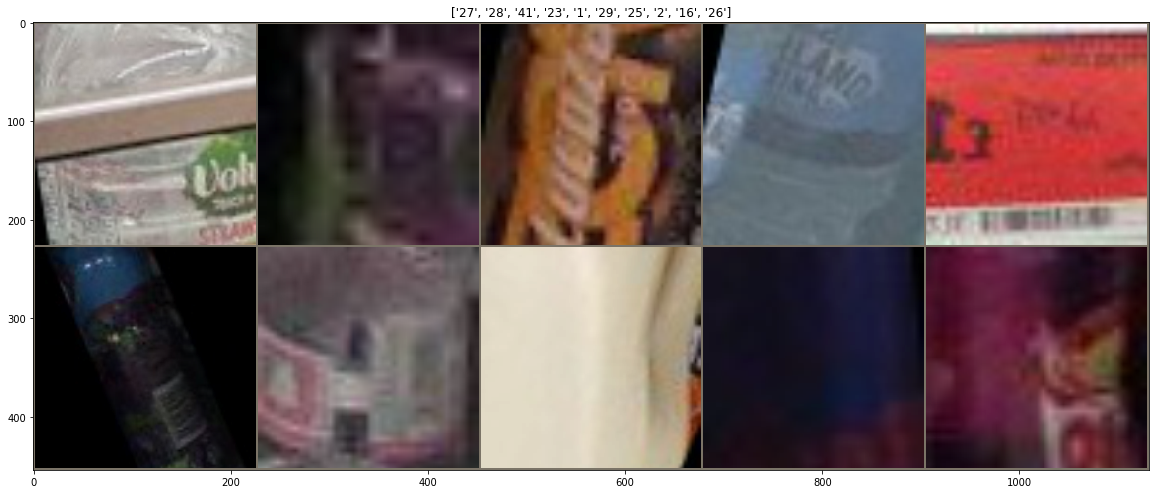

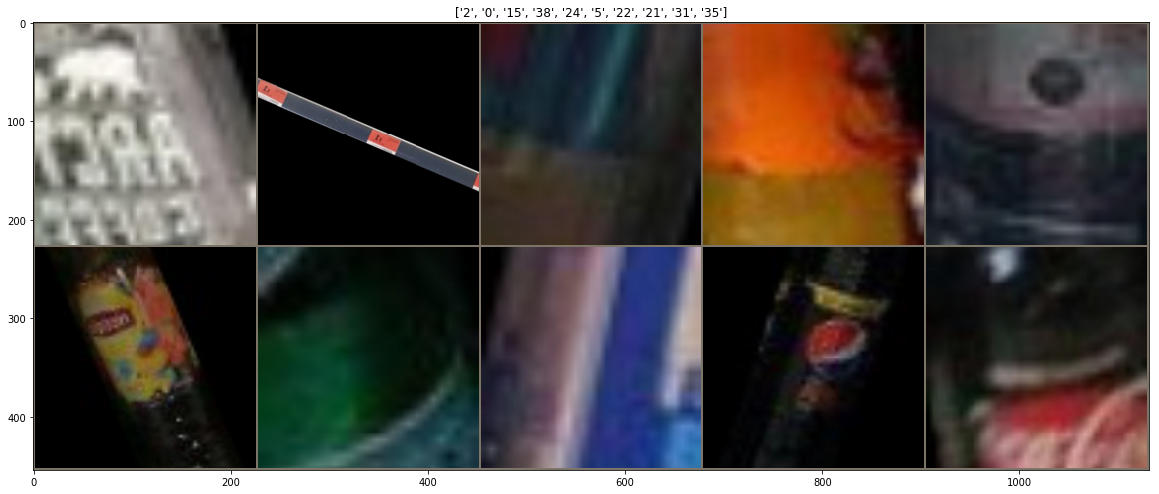

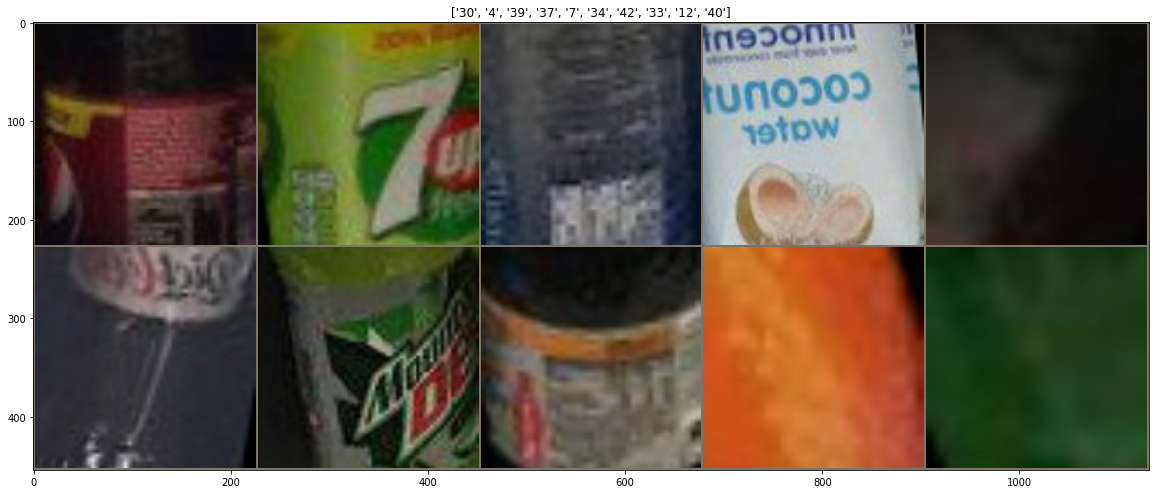

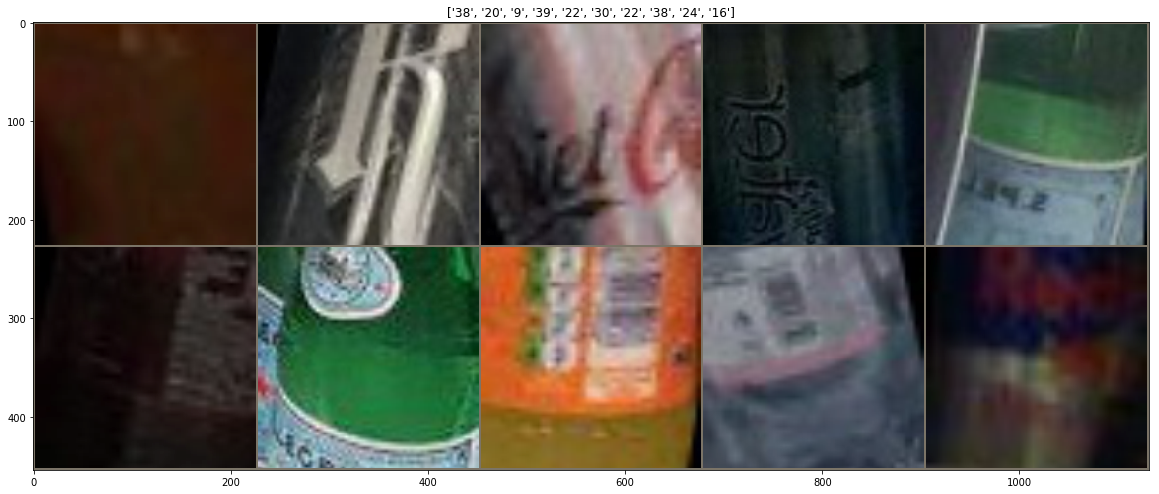

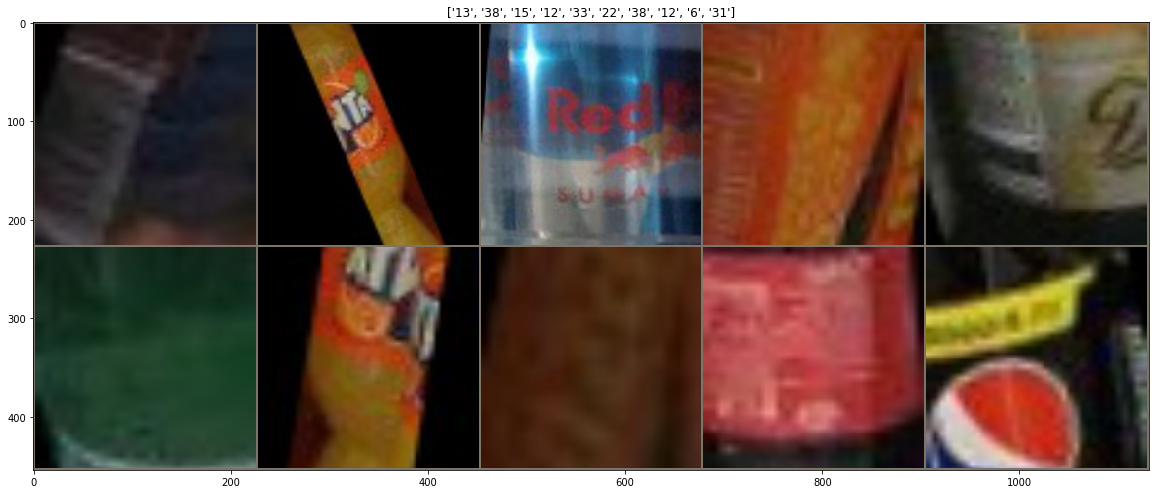

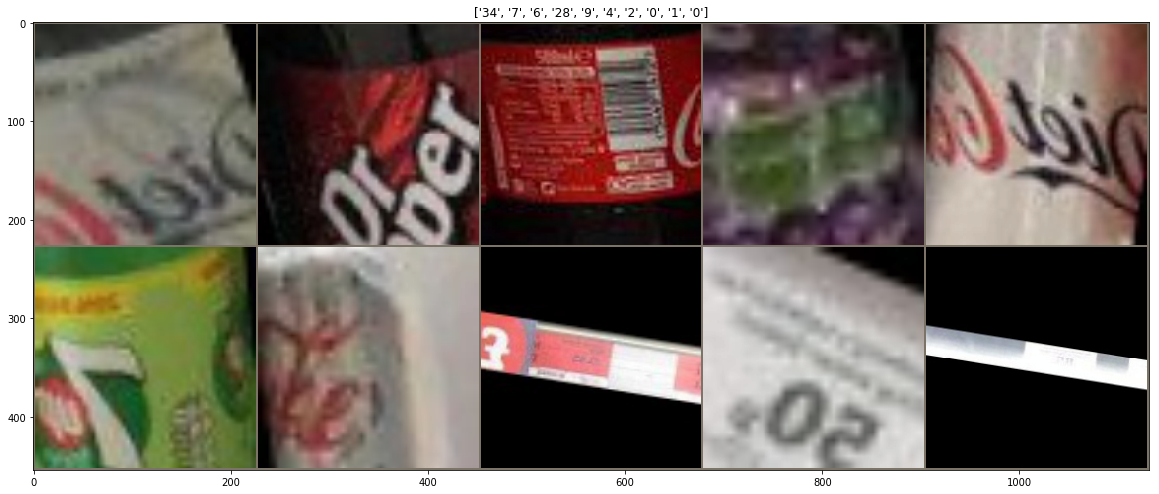

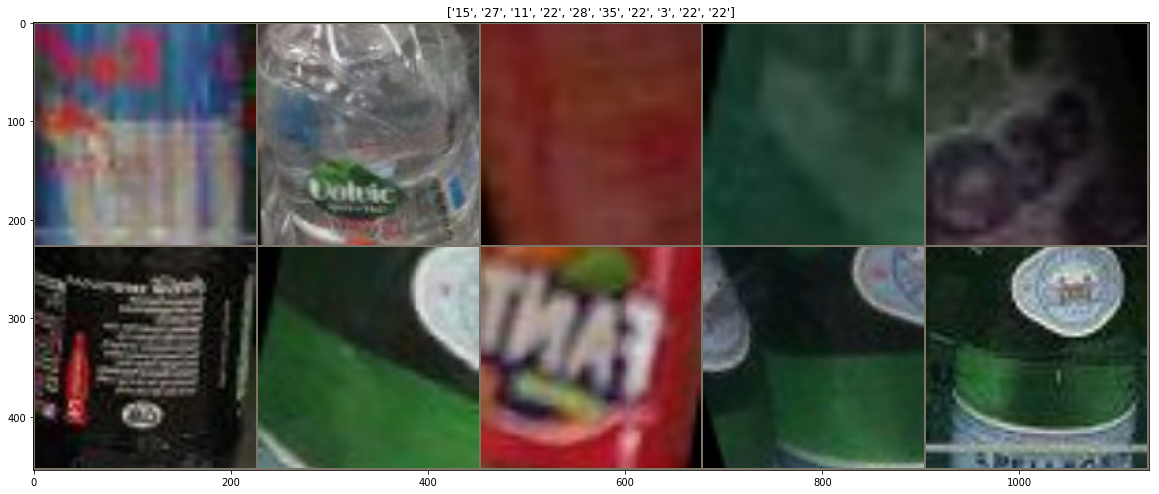

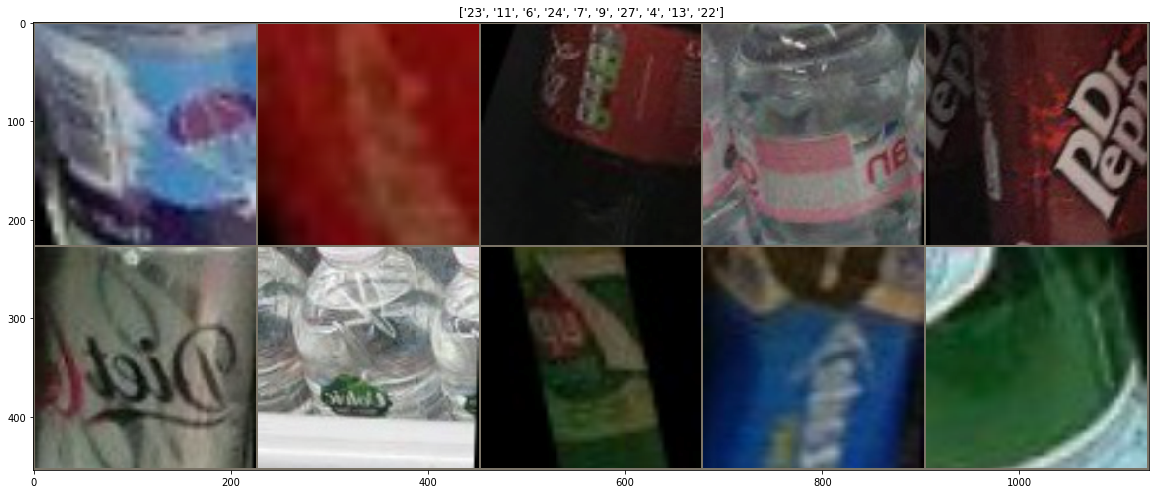

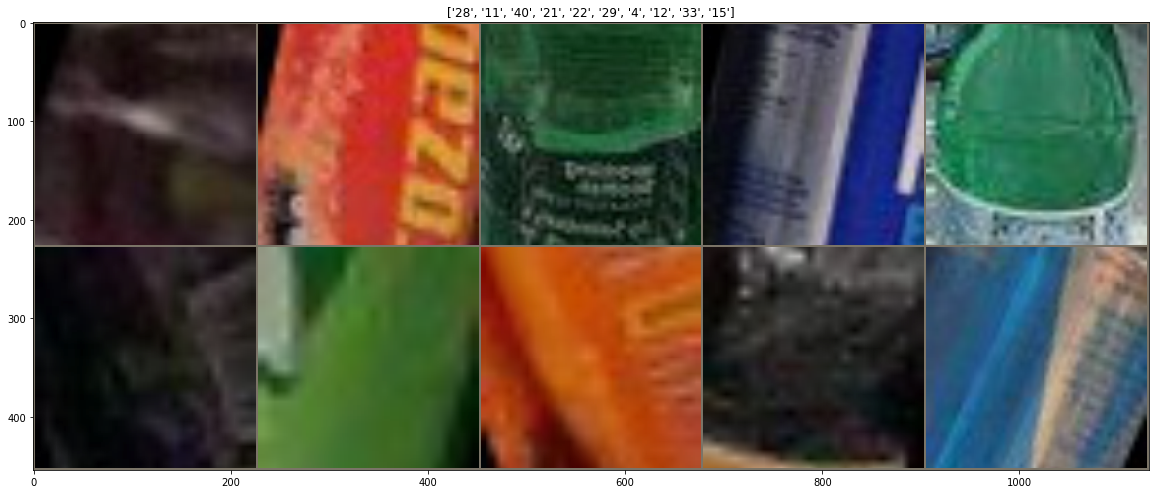

KeyboardInterrupt: 

In [29]:
plt.rcParams['figure.figsize'] = [30, 30]
class_names = image_datasets['train'].classes
for inputs, classes in dataloaders_dict['train']:
    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs, nrow=5)
    imshow(out, title=[class_names[x] for x in classes])
    sleep(0.05)

In [36]:
a = torch.tensor([2., -3., -2.])
b = torch.tensor([2., -3., -2.])
c = a * b
print(c.shape)

torch.Size([3])


In [37]:
c

tensor([4., 9., 4.])